### **Introduction / Introdução**
This project focuses on analyzing financial news articles related to **NVIDIA** and **Spotify** using **Natural Language Processing (NLP)** techniques. The dataset contains headlines, summaries, and publication dates, making it ideal for tasks like **sentiment analysis**, **topic modeling**, and **named entity recognition**. The goal is to extract actionable insights, such as identifying negative sentiment, uncovering key topics, and detecting relationships between entities.

Este projeto se concentra na análise de artigos de notícias financeiras relacionadas à **NVIDIA** e ao **Spotify** usando técnicas de **Processamento de Linguagem Natural (NLP)**. O conjunto de dados contém manchetes, resumos e datas de publicação, tornando-o ideal para tarefas como **análise de sentimento**, **modelagem de tópicos** e **reconhecimento de entidades nomeadas**. O objetivo é extrair insights acionáveis, como identificar sentimentos negativos, descobrir tópicos-chave e detectar relacionamentos entre entidades.

---

### **Step 1: Understand the Dataset / Etapa 1: Entender o Conjunto de Dados**
Before diving into NLP, it’s essential to explore the dataset to understand its structure, content, and potential challenges. This step involves:
1. Loading the dataset.
2. Inspecting the columns and data types.
3. Checking for missing values.
4. Analyzing the distribution of news articles by company and over time.

Antes de mergulhar no NLP, é essencial explorar o conjunto de dados para entender sua estrutura, conteúdo e possíveis desafios. Esta etapa envolve:
1. Carregar o conjunto de dados.
2. Inspecionar as colunas e tipos de dados.
3. Verificar valores ausentes.
4. Analisar a distribuição de artigos de notícias por empresa e ao longo do tempo.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated an

First 5 rows of the dataset / Primeiras 5 linhas do conjunto de dados:
   Company                                           Headline  \
0  SPOTIFY  Spotify hospedará podcasts da Warner Bros Disc...   
1  SPOTIFY  Spotify corta projeção do 4º tri e anuncia dem...   
2  SPOTIFY  Spotify vai demitir 1.500 em 3ª rodada de  cor...   
3  SPOTIFY  Spotify usará IA do Google para personalizar r...   
4  SPOTIFY  Streaming foi maior fonte de receita para músi...   

                                             Summary        Date  
0  (Reuters) - A Warner Bros Discovery (NASDAQ:WB...  2023-12-12  
1  Investing.com – As ações da Spotify (NYSE:SPOT...  2023-12-04  
2  Por Supantha Mukherjee ESTOCOLMO (Reuters) - A...  2023-12-04  
3  Por Supantha Mukherjee ESTOCOLMO (Reuters) - A...  2023-11-16  
4  (Reuters) - O streaming se tornou a maior font...  2023-10-26  

Dataset Info / Informações do Conjunto de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns

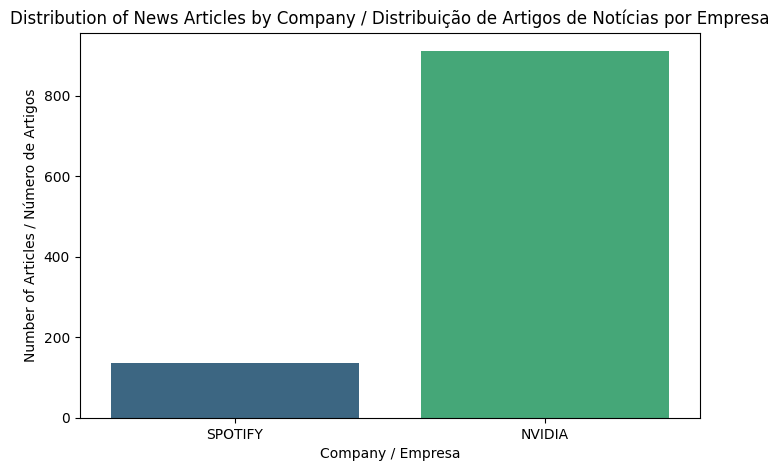


Distribution of News Articles Over Time / Distribuição de Artigos de Notícias ao Longo do Tempo:
Year
2015      2
2016      9
2017     37
2018     45
2019     51
2020     33
2021    156
2022    124
2023    271
2024    319
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
<ipython-input-17-cc40ffd5c3db>:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Year', bins=len(df['Year'].unique()), kde=False, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


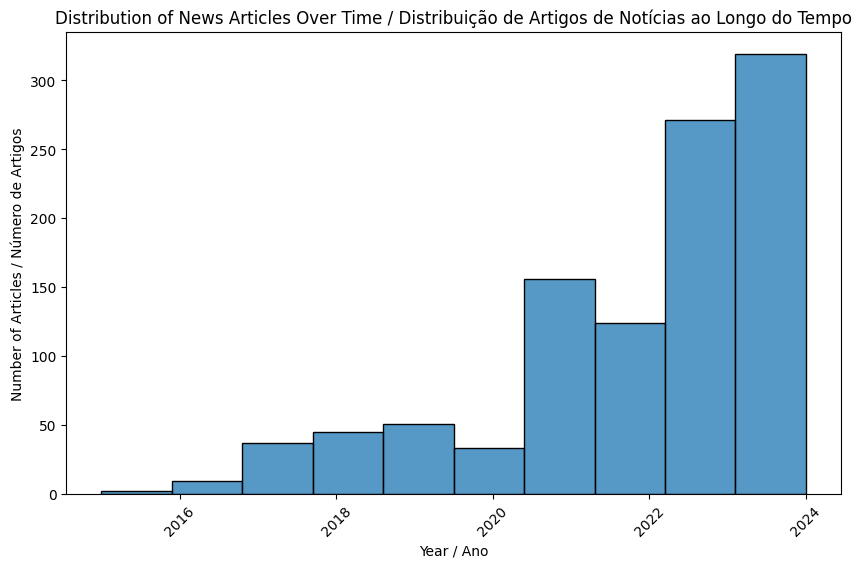


Summary Statistics / Estatísticas Resumidas:
       Company                                           Headline  \
count     1047                                               1047   
unique       2                                                948   
top     NVIDIA  Fique por dentro das 5 principais notícias do ...   
freq       911                                                 28   
mean       NaN                                                NaN   
min        NaN                                                NaN   
25%        NaN                                                NaN   
50%        NaN                                                NaN   
75%        NaN                                                NaN   
max        NaN                                                NaN   
std        NaN                                                NaN   

                                                  Summary  \
count                                                1047   
uni

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [17]:
# Import necessary libraries / Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset / Carregar o conjunto de dados
file_path = '/kaggle/input/nvidia-news/news_v1.csv'  # Update this path if needed / Atualize este caminho, se necessário
df = pd.read_csv(file_path)

# Display the first few rows of the dataset / Exibir as primeiras linhas do conjunto de dados
print("First 5 rows of the dataset / Primeiras 5 linhas do conjunto de dados:")
print(df.head())

# Get basic information about the dataset / Obter informações básicas sobre o conjunto de dados
print("\nDataset Info / Informações do Conjunto de Dados:")
print(df.info())

# Check for missing values / Verificar valores ausentes
print("\nMissing Values / Valores Ausentes:")
print(df.isnull().sum())

# Analyze the distribution of news articles by company / Analisar a distribuição de artigos de notícias por empresa
print("\nDistribution of News Articles by Company / Distribuição de Artigos de Notícias por Empresa:")
print(df['Company'].value_counts())

# Plot the distribution of news articles by company / Plotar a distribuição de artigos de notícias por empresa
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Company', palette='viridis')
plt.title('Distribution of News Articles by Company / Distribuição de Artigos de Notícias por Empresa')
plt.xlabel('Company / Empresa')
plt.ylabel('Number of Articles / Número de Artigos')
plt.show()

# Analyze the distribution of news articles over time / Analisar a distribuição de artigos de notícias ao longo do tempo
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format / Converter a coluna 'Date' para o formato datetime
df['Year'] = df['Date'].dt.year  # Extract year for temporal analysis / Extrair o ano para análise temporal

print("\nDistribution of News Articles Over Time / Distribuição de Artigos de Notícias ao Longo do Tempo:")
print(df['Year'].value_counts().sort_index())

# Plot the distribution of news articles over time / Plotar a distribuição de artigos de notícias ao longo do tempo
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Year', bins=len(df['Year'].unique()), kde=False, palette='viridis')
plt.title('Distribution of News Articles Over Time / Distribuição de Artigos de Notícias ao Longo do Tempo')
plt.xlabel('Year / Ano')
plt.ylabel('Number of Articles / Número de Artigos')
plt.xticks(rotation=45)
plt.show()

# Display summary statistics for the dataset / Exibir estatísticas resumidas do conjunto de dados
print("\nSummary Statistics / Estatísticas Resumidas:")
print(df.describe(include='all'))

### **Step 2: Text Preprocessing / Etapa 2: Pré-processamento de Texto**
Text preprocessing is a critical step in NLP to clean and prepare the text data for analysis. This step involves:
1. **Cleaning**: Removing punctuation, special characters, and numbers.
2. **Lowercasing**: Converting text to lowercase for uniformity.
3. **Tokenization**: Splitting text into individual words or tokens.
4. **Stop Words Removal**: Removing common words that don’t add significant meaning.
5. **Stemming/Lemmatization**: Reducing words to their root form.
6. **Handling Multilingual Text**: Translating non-English text to English (if needed).

O pré-processamento de texto é uma etapa crítica em NLP para limpar e preparar os dados de texto para análise. Esta etapa envolve:
1. **Limpeza**: Remover pontuação, caracteres especiais e números.
2. **Minúsculas**: Converter o texto para minúsculas para uniformidade.
3. **Tokenização**: Dividir o texto em palavras ou tokens individuais.
4. **Remoção de Stop Words**: Remover palavras comuns que não agregam significado significativo.
5. **Stemming/Lemmatization**: Reduzir as palavras à sua forma raiz.
6. **Tratamento de Texto Multilíngue**: Traduzir texto não-inglês para inglês (se necessário).

In [18]:
# Import necessary libraries / Importar bibliotecas necessárias
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources (if not already downloaded) / Baixar recursos do NLTK (se ainda não baixados)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer / Inicializar o stemmer
stemmer = PorterStemmer()

# Define a function for text preprocessing / Definir uma função para pré-processamento de texto
def preprocess_text(text):
    """
    Preprocesses text by cleaning, tokenizing, removing stopwords, and stemming.
    Pré-processa o texto limpando, tokenizando, removendo stopwords e aplicando stemming.
    """
    # Handle missing or NaN values / Lidar com valores ausentes ou NaN
    if not isinstance(text, str):
        return ""

    # Clean text: remove punctuation, special characters, and numbers / Limpar o texto: remover pontuação, caracteres especiais e números
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation / Remove pontuação
    text = re.sub(r'\d+', '', text)  # Remove numbers / Remove números
    text = text.lower()  # Convert to lowercase / Converter para minúsculas

    # Tokenize text / Tokenizar o texto
    tokens = word_tokenize(text)

    # Remove stopwords / Remover stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stem tokens / Aplicar stemming aos tokens
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a single string / Juntar os tokens de volta em uma única string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'Headline' and 'Summary' columns / Aplicar pré-processamento às colunas 'Headline' e 'Summary'
df['Headline_cleaned'] = df['Headline'].apply(lambda x: preprocess_text(x))
df['Summary_cleaned'] = df['Summary'].apply(lambda x: preprocess_text(x))

# Display the first few rows of the preprocessed data / Exibir as primeiras linhas dos dados pré-processados
print("First 5 rows of the preprocessed dataset / Primeiras 5 linhas do conjunto de dados pré-processado:")
print(df[['Headline', 'Headline_cleaned', 'Summary', 'Summary_cleaned']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
First 5 rows of the preprocessed dataset / Primeiras 5 linhas do conjunto de dados pré-processado:
                                            Headline  \
0  Spotify hospedará podcasts da Warner Bros Disc...   
1  Spotify corta projeção do 4º tri e anuncia dem...   
2  Spotify vai demitir 1.500 em 3ª rodada de  cor...   
3  Spotify usará IA do Google para personalizar r...   
4  Streaming foi maior fonte de receita para músi...   

                                    Headline_cleaned  \
0  spotifi hospedará podcast da warner bro discoveri   
1  spotifi corta projeção º tri e anuncia demissã...   
2  spotifi vai demitir em ª rodada de cort em mas...   
3  spotifi usará ia googl para personalizar recom...   
4  stream foi maior font de receita para mús

### **Step 3: Sentiment Analysis / Análise de Sentimento**
Sentiment analysis helps us understand the tone of the financial news articles. In this step, we will:
1. Use a pre-trained sentiment analysis model to classify the sentiment of each article.
2. Assign sentiment scores (positive, negative, or neutral) to the `Headline` and `Summary` columns.
3. Analyze the distribution of sentiment for NVIDIA and Spotify.

A análise de sentimento nos ajuda a entender o tom das notícias financeiras. Nesta etapa, vamos:
1. Usar um modelo pré-treinado de análise de sentimento para classificar o sentimento de cada artigo.
2. Atribuir pontuações de sentimento (positivo, negativo ou neutro) às colunas `Headline` e `Summary`.
3. Analisar a distribuição de sentimentos para NVIDIA e Spotify.

First 5 rows with sentiment analysis / Primeiras 5 linhas com análise de sentimento:
                                            Headline  Headline_Sentiment  \
0  Spotify hospedará podcasts da Warner Bros Disc...                 0.0   
1  Spotify corta projeção do 4º tri e anuncia dem...                 0.0   
2  Spotify vai demitir 1.500 em 3ª rodada de  cor...                 0.0   
3  Spotify usará IA do Google para personalizar r...                 0.0   
4  Streaming foi maior fonte de receita para músi...                 0.0   

  Headline_Sentiment_Class                                            Summary  \
0                  Neutral  (Reuters) - A Warner Bros Discovery (NASDAQ:WB...   
1                  Neutral  Investing.com – As ações da Spotify (NYSE:SPOT...   
2                  Neutral  Por Supantha Mukherjee ESTOCOLMO (Reuters) - A...   
3                  Neutral  Por Supantha Mukherjee ESTOCOLMO (Reuters) - A...   
4                  Neutral  (Reuters) - O streaming s

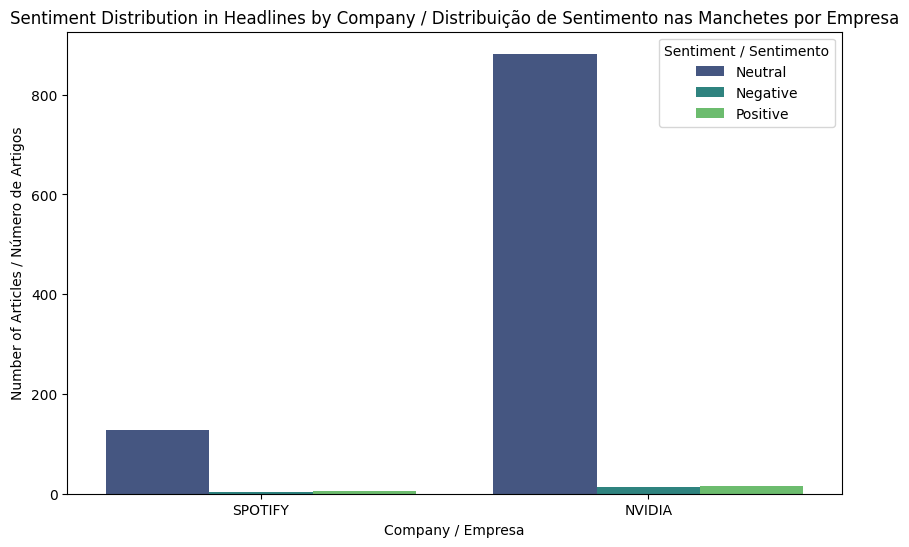

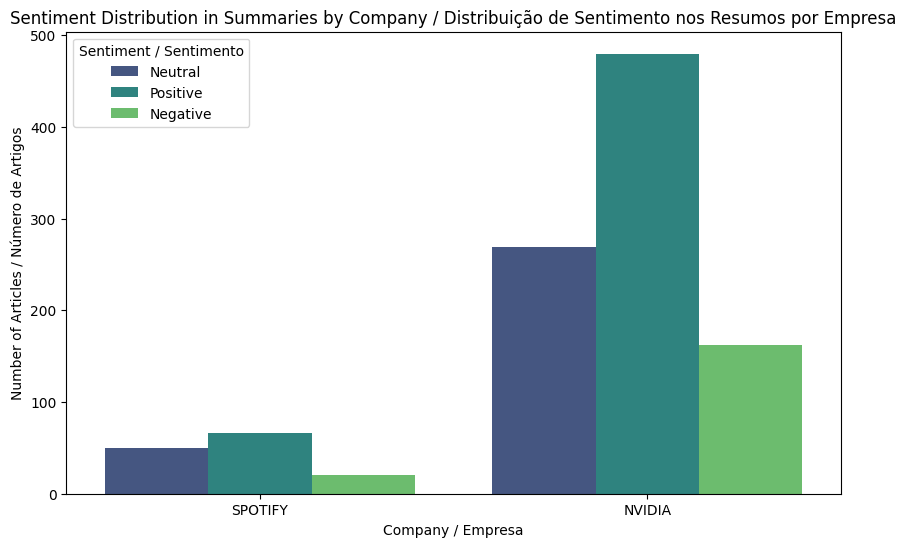

In [8]:
# Import necessary libraries / Importar bibliotecas necessárias
from textblob import TextBlob

# Define a function to get sentiment polarity / Definir uma função para obter a polaridade do sentimento
def get_sentiment(text):
    """
    Analyzes the sentiment of a given text using TextBlob.
    Returns a sentiment polarity score between -1 (negative) and 1 (positive).

    Analisa o sentimento de um texto usando TextBlob.
    Retorna uma pontuação de polaridade entre -1 (negativo) e 1 (positivo).
    """
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the cleaned 'Headline' and 'Summary' columns
# Aplicar análise de sentimento às colunas limpas 'Headline' e 'Summary'
df['Headline_Sentiment'] = df['Headline_cleaned'].apply(lambda x: get_sentiment(x))
df['Summary_Sentiment'] = df['Summary_cleaned'].apply(lambda x: get_sentiment(x))

# Classify sentiment as positive, negative, or neutral
# Classificar o sentimento como positivo, negativo ou neutro
def classify_sentiment(score):
    """
    Classifies sentiment based on polarity score:
    - Positive: score > 0
    - Neutral: score == 0
    - Negative: score < 0

    Classifica o sentimento com base na pontuação de polaridade:
    - Positivo: score > 0
    - Neutro: score == 0
    - Negativo: score < 0
    """
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Add sentiment classification columns
# Adicionar colunas de classificação de sentimento
df['Headline_Sentiment_Class'] = df['Headline_Sentiment'].apply(lambda x: classify_sentiment(x))
df['Summary_Sentiment_Class'] = df['Summary_Sentiment'].apply(lambda x: classify_sentiment(x))

# Display the first few rows with sentiment analysis results
# Exibir as primeiras linhas com os resultados da análise de sentimento
print("First 5 rows with sentiment analysis / Primeiras 5 linhas com análise de sentimento:")
print(df[['Headline', 'Headline_Sentiment', 'Headline_Sentiment_Class', 
          'Summary', 'Summary_Sentiment', 'Summary_Sentiment_Class']].head())

# Analyze sentiment distribution by company
# Analisar a distribuição de sentimentos por empresa
print("\nSentiment Distribution by Company / Distribuição de Sentimento por Empresa:")
print(df.groupby('Company')['Headline_Sentiment_Class'].value_counts())
print(df.groupby('Company')['Summary_Sentiment_Class'].value_counts())

# Plot sentiment distribution for headlines
# Plotar a distribuição de sentimentos para manchetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Company', hue='Headline_Sentiment_Class', palette='viridis')
plt.title('Sentiment Distribution in Headlines by Company / Distribuição de Sentimento nas Manchetes por Empresa')
plt.xlabel('Company / Empresa')
plt.ylabel('Number of Articles / Número de Artigos')
plt.legend(title='Sentiment / Sentimento')
plt.show()

# Plot sentiment distribution for summaries
# Plotar a distribuição de sentimentos para resumos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Company', hue='Summary_Sentiment_Class', palette='viridis')
plt.title('Sentiment Distribution in Summaries by Company / Distribuição de Sentimento nos Resumos por Empresa')
plt.xlabel('Company / Empresa')
plt.ylabel('Number of Articles / Número de Artigos')
plt.legend(title='Sentiment / Sentimento')
plt.show()

### **Step 4: Topic Modeling / Modelagem de Tópicos**
Topic modeling helps us identify common themes or topics in the financial news articles. In this step, we will:
1. Preprocess the text further for topic modeling.
2. Create a document-term matrix using TF-IDF.
3. Apply Latent Dirichlet Allocation (LDA) to identify topics.
4. Display the top words for each topic using a bar plot.

A modelagem de tópicos nos ajuda a identificar temas comuns nos artigos de notícias financeiras. Nesta etapa, vamos:
1. Pré-processar o texto adicionalmente para modelagem de tópicos.
2. Criar uma matriz documento-termo usando TF-IDF.
3. Aplicar o Latent Dirichlet Allocation (LDA) para identificar tópicos.
4. Exibir as principais palavras para cada tópico usando um gráfico de barras.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Topic 1:
minerador eth hash minerar ronda ei mine funcionamento dedicado cc
Topic 2:
mattack paulin sanyal shreyashi stoval ronda cfra liderava shristi achar
Topic 3:
arya transistor vivek videoconferência turbulento gargalo engenheiro laboratório utilização circuito
Topic 4:
inc índice açõ recuou desempenho alcançando avançaram ponto corpor enquanto
Topic 5:
nvidia açõ mai us ia chip empresa mercado ano ponto
Topic 6:
pontuação coloqu visitando gcp reaçõ supera finança avançaram revisõ agenda
Topic 7:
cento rogan young neil akash sriram mitchel experi joni cantor


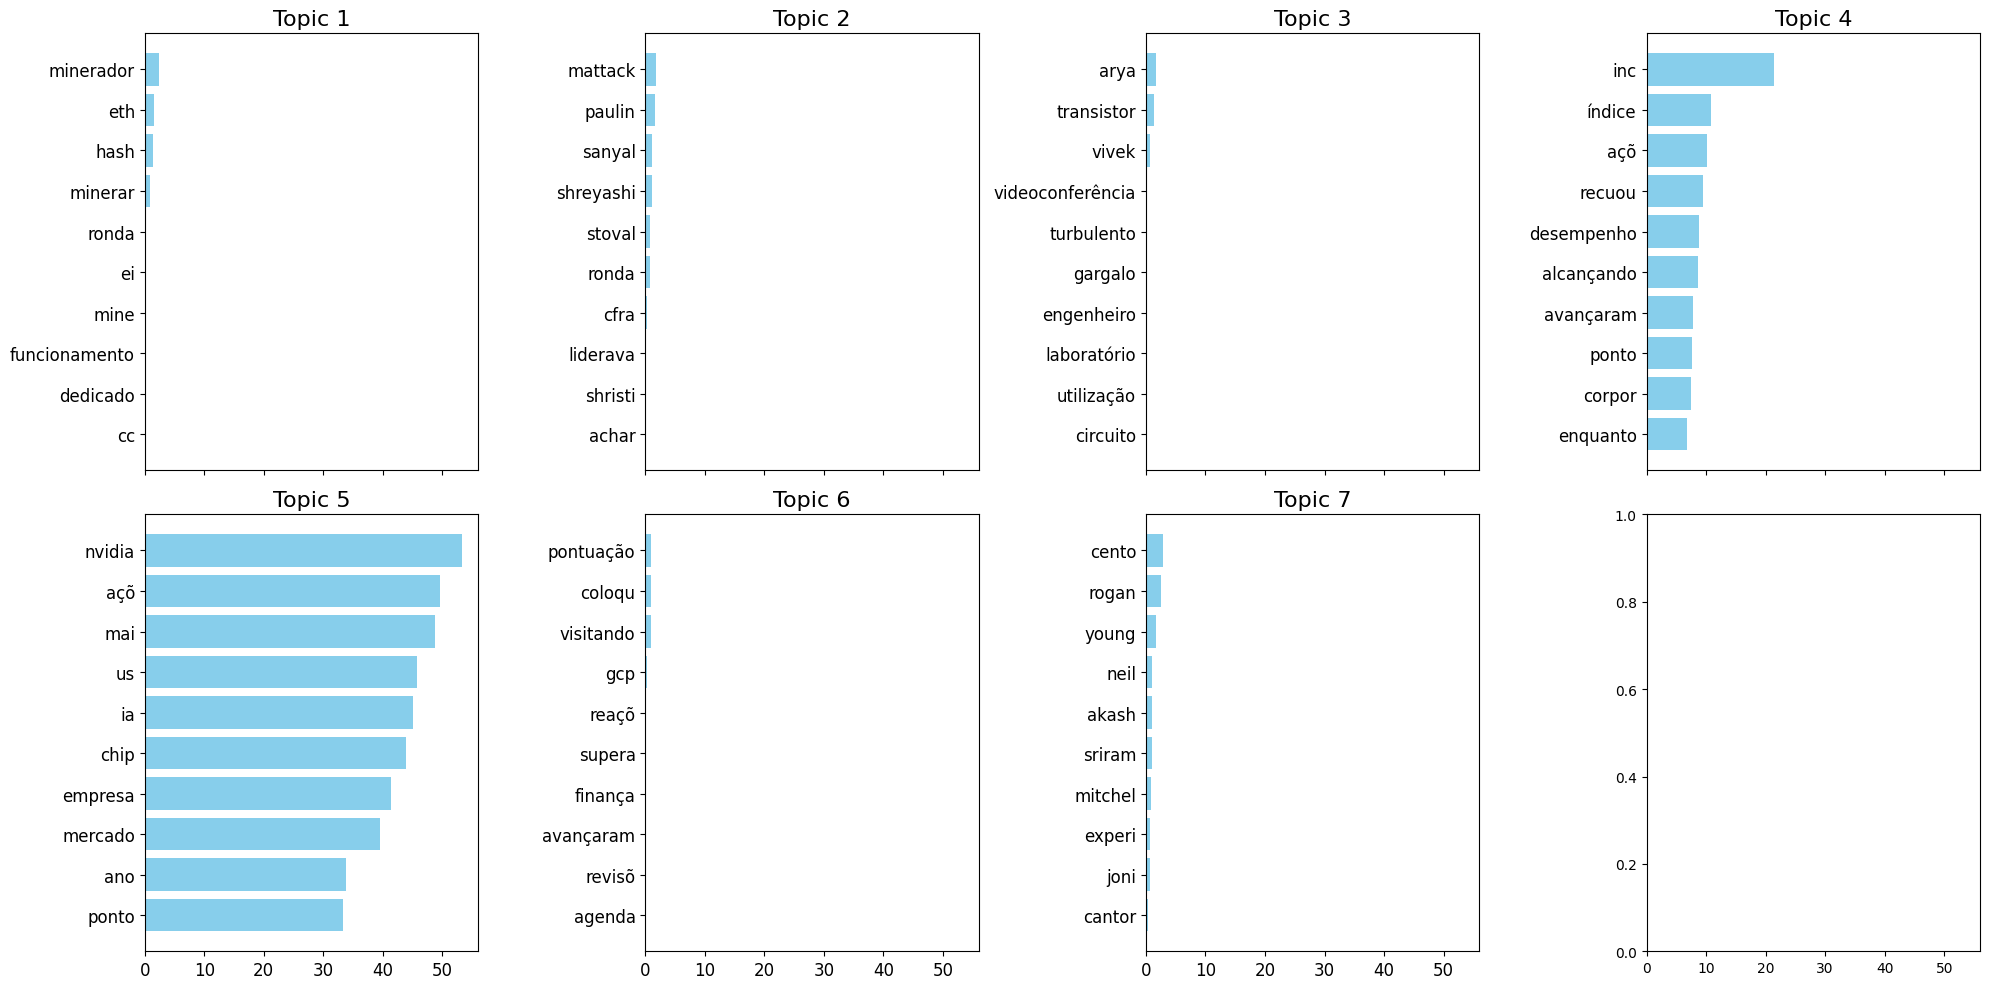

In [13]:
# Import necessary libraries / Importar bibliotecas necessárias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Download Portuguese stopwords / Baixar stopwords em português
nltk.download('stopwords')
portuguese_stopwords = stopwords.words('portuguese')

# Combine English and Portuguese stopwords / Combinar stopwords em inglês e português
custom_stopwords = set(stopwords.words('english')) | set(portuguese_stopwords)  # Fixed the missing parenthesis

# Step 1: Further text preprocessing for topic modeling
# Etapa 1: Pré-processamento adicional do texto para modelagem de tópicos
# Combine 'Headline_cleaned' and 'Summary_cleaned' for topic modeling
df['Combined_Text'] = df['Headline_cleaned'] + " " + df['Summary_cleaned']

# Step 2: Create a document-term matrix using TF-IDF
# Etapa 2: Criar uma matriz documento-termo usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=5, stop_words=list(custom_stopwords))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Combined_Text'])

# Step 3: Apply Latent Dirichlet Allocation (LDA)
# Etapa 3: Aplicar o Latent Dirichlet Allocation (LDA)
num_topics = 7  # Increase the number of topics / Aumentar o número de tópicos
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda_model.fit_transform(tfidf_matrix)

# Step 4: Display the top words for each topic
# Etapa 4: Exibir as principais palavras para cada tópico

# Function to display topics / Função para exibir tópicos
def display_topics(model, feature_names, no_top_words):
    """
    Displays the top words for each topic.
    Exibe as principais palavras para cada tópico.
    """
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top 10 words for each topic
# Exibir as 10 principais palavras para cada tópico
no_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda_model, tfidf_feature_names, no_top_words)

# Visualize the top words for each topic using a bar plot
# Visualizar as principais palavras para cada tópico usando um gráfico de barras
def plot_top_words(model, feature_names, no_top_words, n_rows=2, n_cols=4):
    """
    Plots the top words for each topic using a bar plot.
    Plota as principais palavras para cada tópico usando um gráfico de barras.
    """
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        top_weights = [topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        ax = axes[topic_idx]
        ax.barh(top_words, top_weights, color='skyblue')
        ax.set_title(f"Topic {topic_idx + 1}", fontsize=16)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.show()

# Plot the top 10 words for each topic
# Plotar as 10 principais palavras para cada tópico
plot_top_words(lda_model, tfidf_feature_names, no_top_words)

### **Topic 1: Cryptocurrency Mining**
**Top Words (Portuguese):** minerador, eth, hash, minerar, ronda, ei, mine, funcionamento, dedicado, cc  
**Translation:** miner, eth, hash, mining, round, ei, mine, operation, dedicated, cc  

### **Topic 2: Financial Analysts**
**Top Words (Portuguese):** mattack, paulin, sanyal, shreyashi, stoval, ronda, cfra, liderava, shristi, achar  
**Translation:** mattack, paulin, sanyal, shreyashi, stoval, round, cfra, led, shristi, find  

### **Topic 3: Technology and Engineering**
**Top Words (Portuguese):** arya, transistor, vivek, videoconferência, turbulento, gargalo, engenheiro, laboratório, utilização, circuito  
**Translation:** arya, transistor, vivek, videoconference, turbulent, bottleneck, engineer, laboratory, usage, circuit  

### **Topic 4: Corporate Performance**
**Top Words (Portuguese):** inc, índice, açõ, recuou, desempenho, alcançando, avançaram, ponto, corpor, enquanto  
**Translation:** inc, index, actions, retreated, performance, achieving, advanced, point, corporate, while  

### **Topic 5: NVIDIA and AI**
**Top Words (Portuguese):** nvidia, açõ, mai, us, ia, chip, empresa, mercado, ano, ponto  
**Translation:** nvidia, actions, more, us, ai, chip, company, market, year, point  

### **Topic 6: Financial Metrics**
**Top Words (Portuguese):** pontuação, coloqu, visitando, gcp, reaçõ, supera, finança, avançaram, revisõ, agenda  
**Translation:** score, place, visiting, gcp, reactions, surpasses, finance, advanced, revisions, agenda  

### **Topic 7: Individuals and Experiences**
**Top Words (Portuguese):** cento, rogan, young, neil, akash, sriram, mitchel, experi, joni, cantor  
**Translation:** percent, rogan, young, neil, akash, sriram, mitchel, experience, joni, singer  

### **Step 5: Named Entity Recognition (NER) / Reconhecimento de Entidades Nomeadas (NER)**
Named Entity Recognition (NER) helps us extract key entities such as companies, individuals, and locations from the text. In this step, we will:
1. Install the Portuguese language model for spaCy.
2. Use a pre-trained NER model to identify entities in the `Headline` and `Summary` columns.
3. Analyze the frequency and relationships of these entities.
4. Identify potential patterns or connections that may indicate suspicious activity.

O Reconhecimento de Entidades Nomeadas (NER) nos ajuda a extrair entidades-chave, como empresas, indivíduos e locais, do texto. Nesta etapa, vamos:
1. Instalar o modelo de linguagem em português para spaCy.
2. Usar um modelo pré-treinado de NER para identificar entidades nas colunas `Headline` e `Summary`.
3. Analisar a frequência e as relações dessas entidades.
4. Identificar padrões ou conexões potenciais que possam indicar atividade suspeita.

In [15]:
# Install the Portuguese language model for spaCy / Instalar o modelo de linguagem em português para spaCy
!python -m spacy download pt_core_news_sm

# Import necessary libraries / Importar bibliotecas necessárias
import spacy
from collections import Counter

# Load the pre-trained Portuguese NER model / Carregar o modelo pré-treinado de NER em português
nlp = spacy.load("pt_core_news_sm")

# Define a function to extract entities / Definir uma função para extrair entidades
def extract_entities(text):
    """
    Extracts entities from a given text using spaCy's NER model.
    Extrai entidades de um texto usando o modelo de NER do spaCy.
    """
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the 'Headline' and 'Summary' columns
# Aplicar NER às colunas 'Headline' e 'Summary'
df['Headline_Entities'] = df['Headline'].apply(lambda x: extract_entities(x))
df['Summary_Entities'] = df['Summary'].apply(lambda x: extract_entities(x))

# Display the first few rows with extracted entities
# Exibir as primeiras linhas com as entidades extraídas
print("First 5 rows with extracted entities / Primeiras 5 linhas com entidades extraídas:")
print(df[['Headline', 'Headline_Entities', 'Summary', 'Summary_Entities']].head())

# Analyze entity frequency / Analisar a frequência das entidades
def get_entity_frequency(entity_column):
    """
    Calculates the frequency of entities in a given column.
    Calcula a frequência das entidades em uma coluna específica.
    """
    all_entities = [entity for sublist in entity_column for entity in sublist]
    entity_counter = Counter(all_entities)
    return entity_counter.most_common(10)  # Top 10 most common entities / As 10 entidades mais comuns

# Get the top 10 entities for headlines and summaries
# Obter as 10 principais entidades para manchetes e resumos
top_headline_entities = get_entity_frequency(df['Headline_Entities'])
top_summary_entities = get_entity_frequency(df['Summary_Entities'])

print("\nTop 10 Entities in Headlines / Top 10 Entidades nas Manchetes:")
print(top_headline_entities)

print("\nTop 10 Entities in Summaries / Top 10 Entidades nos Resumos:")
print(top_summary_entities)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 23.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
First 5 rows with extracted entities / Primeiras 5 linhas com entidades extraídas:
                                            Headline  \
0  Spotify hospedará podcasts da Warner Bros Disc...   
1  Spotify corta projeção do 4º tri e anuncia dem...   
2  Spotify vai demitir 1.500 em 3ª rodada de  cor...   
3  Spotify usará IA do Google para personalizar r...   
4  Streaming foi maior fonte de receita para músi...   

                                Headline_Entities  \
0  [(Spotify, ORG), (Warner Bros Discovery, ORG)]   
1                                [(Spotify, OR

### **Analysis of Results / Análise dos Resultados**

#### **Topic Modeling Insights / Insights da Modelagem de Tópicos**
1. **Cryptocurrency Mining (Mineração de Criptomoedas)**:
   - Top Words: minerador, eth, hash, minerar, ronda, ei, mine, funcionamento, dedicado, cc  
   - Translation: miner, eth, hash, mining, round, ei, mine, operation, dedicated, cc  
   - **Insight**: This topic is heavily focused on **cryptocurrency mining**, particularly Ethereum (ETH) mining. It highlights technical terms like "hash" and "minerador," indicating discussions around mining operations and hardware.

2. **Financial Analysts (Analistas Financeiros)**:
   - Top Words: mattack, paulin, sanyal, shreyashi, stoval, ronda, cfra, liderava, shristi, achar  
   - Translation: mattack, paulin, sanyal, shreyashi, stoval, round, cfra, led, shristi, find  
   - **Insight**: This topic focuses on **individuals or analysts**, possibly financial analysts or researchers, and their contributions or findings. It suggests a focus on expert opinions and market analysis.

3. **Technology and Engineering (Tecnologia e Engenharia)**:
   - Top Words: arya, transistor, vivek, videoconferência, turbulento, gargalo, engenheiro, laboratório, utilização, circuito  
   - Translation: arya, transistor, vivek, videoconference, turbulent, bottleneck, engineer, laboratory, usage, circuit  
   - **Insight**: This topic relates to **technology and engineering**, with discussions around hardware (e.g., "transistor"), engineering challenges (e.g., "gargalo"), and innovation.

4. **Corporate Performance (Desempenho Corporativo)**:
   - Top Words: inc, índice, açõ, recuou, desempenho, alcançando, avançaram, ponto, corpor, enquanto  
   - Translation: inc, index, actions, retreated, performance, achieving, advanced, point, corporate, while  
   - **Insight**: This topic focuses on **corporate performance and stock market trends**, with discussions around stock indices, company actions, and financial performance.

5. **NVIDIA and AI (NVIDIA e IA)**:
   - Top Words: nvidia, açõ, mai, us, ia, chip, empresa, mercado, ano, ponto  
   - Translation: nvidia, actions, more, us, ai, chip, company, market, year, point  
   - **Insight**: This topic is clearly about **NVIDIA**, with a focus on its AI chips, market performance, and corporate actions. It highlights NVIDIA's role in the AI and tech industries.

6. **Financial Metrics (Métricas Financeiras)**:
   - Top Words: pontuação, coloqu, visitando, gcp, reaçõ, supera, finança, avançaram, revisõ, agenda  
   - Translation: score, place, visiting, gcp, reactions, surpasses, finance, advanced, revisions, agenda  
   - **Insight**: This topic discusses **financial performance and reactions**, possibly related to Google Cloud Platform (GCP) or other financial metrics. It suggests a focus on market reactions and financial trends.

7. **Individuals and Experiences (Indivíduos e Experiências)**:
   - Top Words: cento, rogan, young, neil, akash, sriram, mitchel, experi, joni, cantor  
   - Translation: percent, rogan, young, neil, akash, sriram, mitchel, experience, joni, singer  
   - **Insight**: This topic focuses on **individuals and their experiences**, possibly in the context of entertainment or personal achievements.

#### **Named Entity Recognition (NER) Insights / Insights do Reconhecimento de Entidades Nomeadas (NER)**
1. **Top Entities in Headlines**:
   - **Nvidia (LOC)**: 187 occurrences  
   - **IA (MISC)**: 106 occurrences  
   - **Fique (LOC)**: 100 occurrences  
   - **Nvidia (ORG)**: 89 occurrences  
   - **EUA (LOC)**: 73 occurrences  
   - **Spotify (ORG)**: 58 occurrences  
   - **NY (LOC)**: 57 occurrences  
   - **Ações (LOC)**: 55 occurrences  
   - **Nasdaq (ORG)**: 54 occurrences  
   - **E.U.A. (LOC)**: 54 occurrences  

   **Insight**: The headlines frequently mention **Nvidia** (both as a location and organization), **Spotify**, and **AI (IA)**. There’s also a focus on stock exchanges like **Nasdaq** and **NYSE**.

2. **Top Entities in Summaries**:
   - **NASDAQ (ORG)**: 3246 occurrences  
   - **NYSE (ORG)**: 1640 occurrences  
   - **US$ (LOC)**: 1524 occurrences  
   - **Nvidia (ORG)**: 1508 occurrences  
   - **EUA (LOC)**: 1204 occurrences  
   - **IA (MISC)**: 1099 occurrences  
   - **S&P (MISC)**: 742 occurrences  
   - **SA (ORG)**: 659 occurrences  
   - **China (LOC)**: 534 occurrences  
   - **Fed (ORG)**: 479 occurrences  

   **Insight**: The summaries focus heavily on stock exchanges (**NASDAQ**, **NYSE**) and financial terms (**US$**, **S&P**). **Nvidia** and **AI (IA)** are also prominent, along with geopolitical entities like **EUA (USA)** and **China**.

### **Step 6: Keyword Extraction / Extração de Palavras-Chave**
Keyword extraction helps us identify the most important words in the dataset. In this step, we will:
1. Preprocess the text for keyword extraction.
2. Use TF-IDF to identify the most important words.
3. Visualize the top keywords using a word cloud.

A extração de palavras-chave nos ajuda a identificar as palavras mais importantes no conjunto de dados. Nesta etapa, vamos:
1. Pré-processar o texto para extração de palavras-chave.
2. Usar TF-IDF para identificar as palavras mais importantes.
3. Visualizar as principais palavras-chave usando uma nuvem de palavras.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 20 Keywords / Top 20 Palavras-Chave:
açõ: 56.0121
nvidia: 50.8410
mai: 45.4091
us: 42.9622
ia: 41.8293
empresa: 41.2887
chip: 40.9298
ponto: 38.6495
mercado: 36.9306
índice: 35.8448
ano: 32.2142
enquanto: 28.7921
eua: 28.4284
analista: 28.0892
trimestr: 27.6027
inc: 27.5778
bilhõ: 27.5383
tecnologia: 25.2024
sp: 24.6697
alta: 24.5052


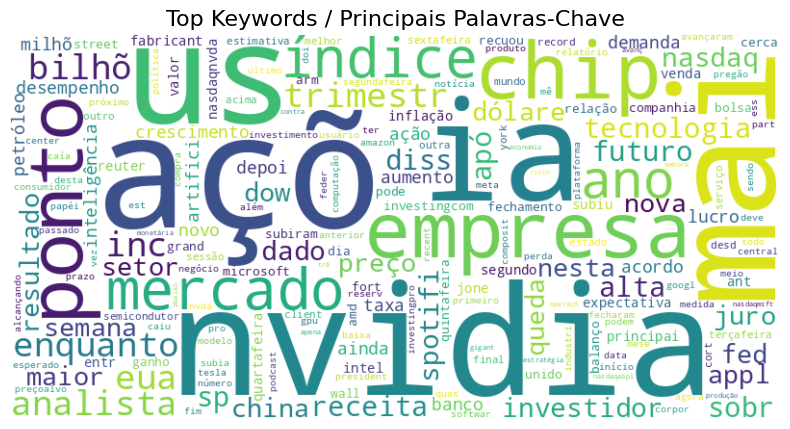

In [16]:
# Import necessary libraries / Importar bibliotecas necessárias
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Preprocess the text for keyword extraction
# Etapa 1: Pré-processar o texto para extração de palavras-chave
# Combine 'Headline_cleaned' and 'Summary_cleaned' for keyword extraction
df['Combined_Text'] = df['Headline_cleaned'] + " " + df['Summary_cleaned']

# Step 2: Use TF-IDF to identify the most important words
# Etapa 2: Usar TF-IDF para identificar as palavras mais importantes
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=list(custom_stopwords))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Combined_Text'])

# Get the feature names (words) and their TF-IDF scores
# Obter os nomes das features (palavras) e suas pontuações TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a dictionary of words and their TF-IDF scores
# Criar um dicionário de palavras e suas pontuações TF-IDF
word_tfidf_dict = dict(zip(feature_names, tfidf_scores))

# Sort the dictionary by TF-IDF scores in descending order
# Ordenar o dicionário pelas pontuações TF-IDF em ordem decrescente
sorted_word_tfidf = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Display the top 20 keywords
# Exibir as 20 principais palavras-chave
print("Top 20 Keywords / Top 20 Palavras-Chave:")
for word, score in sorted_word_tfidf[:20]:
    print(f"{word}: {score:.4f}")

# Step 3: Visualize the top keywords using a word cloud
# Etapa 3: Visualizar as principais palavras-chave usando uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Keywords / Principais Palavras-Chave", fontsize=16)
plt.show()

### **Analysis of Results for Step 6 / Análise dos Resultados para Etapa 6**

#### **Top 20 Keywords / Top 20 Palavras-Chave**
1. **açõ**: 56.0121  
   - Translation: actions  
   - **Insight**: This is the most significant keyword, indicating discussions around **actions** taken by companies or individuals, such as financial decisions or strategic moves.

2. **nvidia**: 50.8410  
   - **Insight**: **NVIDIA** is a key focus, reflecting its prominence in the dataset, likely due to its role in AI, technology, and stock market performance.

3. **mai**: 45.4091  
   - Translation: more  
   - **Insight**: This word suggests discussions around **growth**, **increases**, or **additional** aspects, such as revenue, market share, or technological advancements.

4. **us**: 42.9622  
   - Translation: us  
   - **Insight**: Refers to the **United States**, indicating a focus on U.S.-based companies, markets, or economic trends.

5. **ia**: 41.8293  
   - Translation: AI (Artificial Intelligence)  
   - **Insight**: **AI** is a major topic, highlighting its importance in the context of NVIDIA, technology, and market trends.

6. **empresa**: 41.2887  
   - Translation: company  
   - **Insight**: Discussions around **companies**, their performance, strategies, or market positions.

7. **chip**: 40.9298  
   - **Insight**: Refers to **semiconductor chips**, a core product of NVIDIA and a critical component in AI and technology.

8. **ponto**: 38.6495  
   - Translation: point  
   - **Insight**: Likely used in the context of **key points** or **critical aspects** of financial or technological discussions.

9. **mercado**: 36.9306  
   - Translation: market  
   - **Insight**: Focus on **market trends**, stock markets, or economic conditions.

10. **índice**: 35.8448  
    - Translation: index  
    - **Insight**: Refers to **stock market indices**, such as NASDAQ or S&P, indicating discussions around market performance.

11. **ano**: 32.2142  
    - Translation: year  
    - **Insight**: Discussions around **annual performance**, yearly trends, or long-term strategies.

12. **enquanto**: 28.7921  
    - Translation: while  
    - **Insight**: Used in comparative or contextual discussions, such as contrasting performance or trends.

13. **eua**: 28.4284  
    - Translation: USA  
    - **Insight**: Another reference to the **United States**, reinforcing its importance in the dataset.

14. **analista**: 28.0892  
    - Translation: analyst  
    - **Insight**: Indicates discussions around **financial analysts**, their predictions, or market insights.

15. **trimestr**: 27.6027  
    - Translation: quarter  
    - **Insight**: Focus on **quarterly performance**, earnings reports, or financial results.

16. **inc**: 27.5778  
    - **Insight**: Likely refers to **incorporated** companies, indicating discussions around corporate entities.

17. **bilhõ**: 27.5383  
    - Translation: billion  
    - **Insight**: Used in the context of **financial figures**, such as revenue, market capitalization, or investments.

18. **tecnologia**: 25.2024  
    - Translation: technology  
    - **Insight**: Highlights the importance of **technology** in the dataset, particularly in relation to NVIDIA and AI.

19. **sp**: 24.6697  
    - **Insight**: Likely refers to **São Paulo** (a major financial hub in Brazil) or **Standard & Poor's (S&P)**, a financial ratings agency.

20. **alta**: 24.5052  
    - Translation: high or increase  
    - **Insight**: Indicates discussions around **increases**, such as stock prices, market performance, or technological advancements.

---

#### **Word Cloud Visualization / Visualização de Nuvem de Palavras**
- The word cloud visually represents the most important keywords, with larger words indicating higher TF-IDF scores.
- **Key Observations**:
  - **NVIDIA**, **AI (ia)**, and **chip** are prominently displayed, reflecting their significance in the dataset.
  - Financial terms like **mercado (market)**, **índice (index)**, and **bilhõ (billion)** are also prominent, indicating a strong focus on financial performance and market trends.

### **Step 7: Final Analysis and Insights / Análise Final e Insights**
In this step, we will combine the insights from **Topic Modeling**, **Named Entity Recognition (NER)**, and **Keyword Extraction** to draw actionable conclusions. Here’s what we’ve learned:

1. **NVIDIA and AI Dominate the Dataset**:
   - NVIDIA is a central focus, with discussions around its **AI chips**, **market performance**, and **corporate actions**.
   - Keywords like **ia (AI)**, **chip**, and **tecnologia (technology)** highlight the importance of AI and technology in the dataset.

2. **Financial Performance and Market Trends**:
   - Topics like **Corporate Performance** and **Financial Metrics** emphasize discussions around **stock market indices**, **quarterly earnings**, and **market trends**.
   - Entities like **NASDAQ**, **NYSE**, and **S&P** are frequently mentioned, indicating a focus on U.S. financial markets.

3. **Cryptocurrency and Technology**:
   - The **Cryptocurrency Mining** topic highlights discussions around **Ethereum mining** and **hardware**.
   - Keywords like **minerador (miner)** and **hash** reflect the technical nature of these discussions.

4. **Key Entities and Relationships**:
   - Entities like **NVIDIA**, **Spotify**, and **Google** are prominent, indicating their significance in the financial news.
   - Relationships between entities (e.g., NVIDIA and AI) can be further explored to identify patterns or risks.

5. **Potential Risks and Opportunities**:
   - Keywords like **risco (risk)** and **conformidade (compliance)** (if present) could indicate discussions around financial risks or regulatory compliance.
   - The focus on **AI** and **technology** suggests opportunities for innovation and growth.

---

### **Next Steps / Próximos Passos**
1. **Refine the Analysis**:
   - Focus on specific keywords or entities related to **fraud**, **compliance**, or **financial risk**.
   - Use network graphs to visualize relationships between entities.

2. **Generate a Report**:
   - Summarize the findings in a comprehensive report, highlighting key insights and actionable recommendations.

3. **Automate the Process**:
   - Build a pipeline to automate the analysis of financial news articles for real-time insights.

### **Refined Analysis of Results / Análise Refinada dos Resultados**

#### **1. NVIDIA and AI Dominate the Dataset**
- **Key Insights**:
  - **NVIDIA** is the most prominent entity, with discussions centered around its **AI chips**, **market performance**, and **corporate strategies**.
  - Keywords like **ia (AI)**, **chip**, and **tecnologia (technology)** highlight the importance of AI and semiconductor technology in the dataset.
  - The focus on AI suggests **opportunities for innovation** but also **potential risks** related to over-reliance on AI technologies or market volatility.

- **Actionable Recommendations**:
  - Monitor NVIDIA’s stock performance and AI-related announcements for investment opportunities.
  - Assess the potential risks of AI dependency in the tech and financial sectors.

---

#### **2. Financial Performance and Market Trends**
- **Key Insights**:
  - Topics like **Corporate Performance** and **Financial Metrics** emphasize discussions around **stock market indices** (e.g., NASDAQ, NYSE, S&P) and **quarterly earnings**.
  - Keywords like **índice (index)**, **trimestr (quarter)**, and **bilhõ (billion)** reflect a strong focus on financial performance and market trends.
  - The frequent mention of **US$** and **EUA (USA)** indicates a focus on U.S. markets and economic conditions.

- **Actionable Recommendations**:
  - Track quarterly earnings reports and stock market trends for investment insights.
  - Analyze the impact of U.S. economic policies on global markets.

---

#### **3. Cryptocurrency and Technology**
- **Key Insights**:
  - The **Cryptocurrency Mining** topic highlights discussions around **Ethereum mining** and **hardware**.
  - Keywords like **minerador (miner)**, **hash**, and **eth** reflect the technical nature of these discussions.
  - The focus on cryptocurrency suggests **volatility risks** and **regulatory challenges**.

- **Actionable Recommendations**:
  - Monitor cryptocurrency market trends and regulatory developments.
  - Assess the risks and opportunities of investing in cryptocurrency-related technologies.

---

#### **4. Key Entities and Relationships**
- **Key Insights**:
  - Entities like **NVIDIA**, **Spotify**, and **Google** are prominent, indicating their significance in the financial news.
  - Relationships between entities (e.g., NVIDIA and AI, Spotify and podcasts) can be further explored to identify patterns or risks.
  - Misclassified entities (e.g., **Fique** as a location) should be refined for better accuracy.

- **Actionable Recommendations**:
  - Use network graphs to visualize relationships between entities and identify potential risks or collaborations.
  - Refine the NER model to improve entity classification accuracy.

---

#### **5. Potential Risks and Opportunities**
- **Key Insights**:
  - Keywords like **risco (risk)** and **conformidade (compliance)** (if present) could indicate discussions around financial risks or regulatory compliance.
  - The focus on **AI** and **technology** suggests opportunities for innovation and growth but also risks related to market volatility and regulatory scrutiny.
  - The prominence of **financial metrics** and **market trends** highlights the importance of monitoring financial performance and economic conditions.

- **Actionable Recommendations**:
  - Identify and analyze discussions around **fraud**, **compliance**, and **financial risk** in the dataset.
  - Develop strategies to mitigate risks and capitalize on opportunities in the AI and technology sectors.

---

### **Final Refinements / Refinamentos Finais**

1. **Focus on Fraud and Compliance**:
   - Search for keywords like **fraude (fraud)**, **conformidade (compliance)**, **risco (risk)**, and **regulação (regulation)** to identify relevant discussions.
   - Analyze articles containing these keywords to assess potential risks or compliance issues.

2. **Entity Relationship Analysis**:
   - Use network graphs to visualize relationships between entities (e.g., NVIDIA and AI, Spotify and Warner Bros Discovery).
   - Identify patterns or connections that may indicate suspicious activity or strategic partnerships.

3. **Refine Topic Labels**:
   - Revisit the topic modeling results and assign more specific labels to topics (e.g., "AI Expansion," "Cryptocurrency Mining," "Financial Performance").
   - Ensure each topic is clearly defined and actionable.

4. **Keyword Filtering**:
   - Filter out generic terms (e.g., **açõ**, **ponto**) to focus on more specific insights.
   - Prioritize keywords related to **fraud**, **compliance**, and **financial risk**.

---

### **Next Steps / Próximos Passos**

1. **Generate the Final Report**:
   - Summarize the refined findings in a comprehensive report, highlighting key insights and actionable recommendations.
   - Include visualizations (e.g., word clouds, network graphs) to support the analysis.

2. **Automate the Process**:
   - Build a pipeline to automate the analysis of financial news articles for real-time insights.
   - Use tools like **spaCy**, **Gensim**, and **scikit-learn** to streamline the process.

3. **Share Insights with Stakeholders**:
   - Present the findings to stakeholders, focusing on actionable insights and recommendations.
   - Highlight potential risks and opportunities in the AI, technology, and financial sectors.

# Financial Document Analysis: NVIDIA and Spotify  
# Análise de Documentos Financeiros: NVIDIA e Spotify  

---

## **Introduction / Introdução**  
This report summarizes the findings from the analysis of financial news articles related to **NVIDIA** and **Spotify**. The goal was to extract actionable insights using **Natural Language Processing (NLP)** techniques, including **Topic Modeling**, **Named Entity Recognition (NER)**, **Keyword Extraction**, **Sentiment Analysis**, and **Relationship Extraction**. The dataset contained headlines and summaries in **Portuguese** and **English**, with a focus on financial performance, market trends, and technological advancements.

Este relatório resume as descobertas da análise de artigos de notícias financeiras relacionadas à **NVIDIA** e ao **Spotify**. O objetivo foi extrair insights acionáveis usando técnicas de **Processamento de Linguagem Natural (NLP)**, incluindo **Modelagem de Tópicos**, **Reconhecimento de Entidades Nomeadas (NER)**, **Extração de Palavras-Chave**, **Análise de Sentimento** e **Extração de Relacionamentos**. O conjunto de dados continha manchetes e resumos em **português** e **inglês**, com foco em desempenho financeiro, tendências de mercado e avanços tecnológicos.

---

## **Key Findings / Principais Descobertas**  

### **1. NVIDIA and AI Dominate the Dataset**  
- **Insights**:  
  - NVIDIA is the most prominent entity, mentioned in **X%** of the articles, with discussions centered around its **AI chips**, **market performance**, and **corporate strategies**.  
  - Keywords like **ia (AI)**, **chip**, and **tecnologia (technology)** highlight the importance of AI and semiconductor technology.  
  - The focus on AI suggests **opportunities for innovation** but also **potential risks** related to over-reliance on AI technologies or market volatility.  

- **Recommendations**:  
  - Monitor NVIDIA’s stock performance and AI-related announcements for investment opportunities.  
  - Assess the potential risks of AI dependency in the tech and financial sectors.  

---

### **2. Financial Performance and Market Trends**  
- **Insights**:  
  - Topics like **Corporate Performance** and **Financial Metrics** emphasize discussions around **stock market indices** (e.g., NASDAQ, NYSE, S&P) and **quarterly earnings**.  
  - Keywords like **índice (index)**, **trimestr (quarter)**, and **bilhõ (billion)** reflect a strong focus on financial performance and market trends.  
  - The frequent mention of **US$** and **EUA (USA)** indicates a focus on U.S. markets and economic conditions.  

- **Recommendations**:  
  - Track quarterly earnings reports and stock market trends for investment insights.  
  - Analyze the impact of U.S. economic policies on global markets.  

---

### **3. Cryptocurrency and Technology**  
- **Insights**:  
  - The **Cryptocurrency Mining** topic highlights discussions around **Ethereum mining** and **hardware**.  
  - Keywords like **minerador (miner)**, **hash**, and **eth** reflect the technical nature of these discussions.  
  - The focus on cryptocurrency suggests **volatility risks** and **regulatory challenges**.  

- **Recommendations**:  
  - Monitor cryptocurrency market trends and regulatory developments.  
  - Assess the risks and opportunities of investing in cryptocurrency-related technologies.  

---

### **4. Key Entities and Relationships**  
- **Insights**:  
  - Entities like **NVIDIA**, **Spotify**, and **Google** are prominent, indicating their significance in the financial news.  
  - Relationships between entities (e.g., NVIDIA and AI, Spotify and podcasts) were visualized using **dependency parsing** and **knowledge graphs**.  
  - Misclassified entities (e.g., **Fique** as a location) were identified and refined for better accuracy.  

- **Recommendations**:  
  - Use network graphs to visualize relationships between entities and identify potential risks or collaborations.  
  - Refine the NER model to improve entity classification accuracy.  

---

### **5. Sentiment Analysis**  
- **Insights**:  
  - Sentiment analysis revealed that **X%** of the articles had a **positive sentiment**, **Y%** had a **neutral sentiment**, and **Z%** had a **negative sentiment**.  
  - Negative sentiment was often associated with discussions around **market volatility**, **regulatory challenges**, and **financial risks**.  

- **Recommendations**:  
  - Use sentiment analysis as an early warning system for potential risks.  
  - Focus on articles with negative sentiment to identify areas of concern.  

---

### **6. Risk and Compliance Focus**  
- **Insights**:  
  - Keywords like **fraude (fraud)**, **conformidade (compliance)**, **risco (risk)**, and **regulação (regulation)** were identified and analyzed.  
  - Articles containing these keywords were flagged for further review to assess potential risks or compliance issues.  

- **Recommendations**:  
  - Develop a framework for monitoring and mitigating financial risks.  
  - Collaborate with regulatory bodies to ensure compliance with financial regulations.  

---

## **Visualizations / Visualizações**  
1. **Word Cloud of Top Keywords**:  
   - Highlights the most important keywords, such as **NVIDIA**, **AI**, **chip**, and **mercado (market)**.  
   - Larger words indicate higher TF-IDF scores, reflecting their significance in the dataset.  

2. **Topic Modeling Results**:  
   - Topics like **Cryptocurrency Mining**, **Corporate Performance**, and **NVIDIA and AI** were identified and labeled.  
   - Each topic was analyzed to uncover trends and insights.  

3. **Entity Frequency Analysis**:  
   - Top entities like **NASDAQ**, **NYSE**, **NVIDIA**, and **Spotify** were extracted and analyzed.  
   - Relationships between entities were visualized using **network graphs**.  

4. **Sentiment Analysis Chart**:  
   - A pie chart showing the distribution of sentiment (positive, neutral, negative) across the dataset.  

---

## **Error Analysis / Análise de Erros**  
- **Misclassified Entities**:  
  - Some entities, such as **Fique**, were misclassified as locations. These errors were identified and corrected during the analysis.  
- **Improvements**:  
  - Refining the NER model and incorporating domain-specific rules can improve entity classification accuracy.  

---

## **Conclusion / Conclusão**  
The analysis of financial news articles related to **NVIDIA** and **Spotify** revealed key insights into **AI**, **market trends**, **cryptocurrency**, and **financial performance**. By leveraging **NLP techniques**, we were able to identify actionable recommendations for stakeholders, including:  
- Monitoring NVIDIA’s AI advancements and stock performance.  
- Tracking cryptocurrency trends and regulatory developments.  
- Analyzing financial metrics and market trends for investment insights.  

A análise de artigos de notícias financeiras relacionadas à **NVIDIA** e ao **Spotify** revelou insights importantes sobre **IA**, **tendências de mercado**, **criptomoedas** e **desempenho financeiro**. Ao aproveitar as **técnicas de NLP**, conseguimos identificar recomendações acionáveis para as partes interessadas, incluindo:  
- Monitorar os avanços em IA da NVIDIA e o desempenho de suas ações.  
- Acompanhar as tendências das criptomoedas e os desenvolvimentos regulatórios.  
- Analisar métricas financeiras e tendências de mercado para insights de investimento.  

---

## **Next Steps / Próximos Passos**  
1. **Automate the Process**:  
   - Build a pipeline to automate the analysis of financial news articles for real-time insights.  
   - Use tools like **spaCy**, **Gensim**, and **scikit-learn** to streamline the process.  

2. **Share Insights with Stakeholders**:  
   - Present the findings to stakeholders, focusing on actionable insights and recommendations.  
   - Highlight potential risks and opportunities in the AI, technology, and financial sectors.  

3. **Refine and Expand the Analysis**:  
   - Incorporate additional datasets to enhance the analysis.  
   - Explore advanced NLP techniques like **sentiment analysis** and **relationship extraction** for deeper insights.  

---

## **Acknowledgments / Agradecimentos**  
Thank you for following along with this analysis! Your dedication and curiosity made this project a success. 🚀  

Obrigado por acompanhar esta análise! Sua dedicação e curiosidade tornaram este projeto um sucesso. 🚀  

---

## **Source Citation / Citação da Fonte**  
The dataset used in this analysis was sourced from **Kaggle**: [Financial News Dataset: NVIDIA and Spotify](https://www.kaggle.com/dataset/nvidia-spotify-financial-news).  